# PCA Iris Dataset

#### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

## 1. Memuat Data
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

# membaca data
vertebral = pd.read_csv(
    filepath_or_buffer='~/Downloads/vertebral_column_data/column_2C.dat',
    header=None,
    sep=',')

# definisikan nama kolom
vertebral.columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                   'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'kelas']
vertebral.dropna(how="all", inplace=True) # menghilangkan data row kosong (null)

vertebral.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,kelas
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
5,40.25,13.92,25.12,26.33,130.33,2.23,AB
6,53.43,15.86,37.17,37.57,120.57,5.99,AB
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB
8,43.79,13.53,42.69,30.26,125.00,13.29,AB
9,36.69,5.01,41.95,31.68,84.24,0.66,AB


In [2]:
vertebral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   kelas                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [3]:
# split data table into data X and class labels y

X = vertebral.iloc[:,0:6].values
y = vertebral.iloc[:,6].values
type(X)

numpy.ndarray

## 2. Visualisasi Data
---

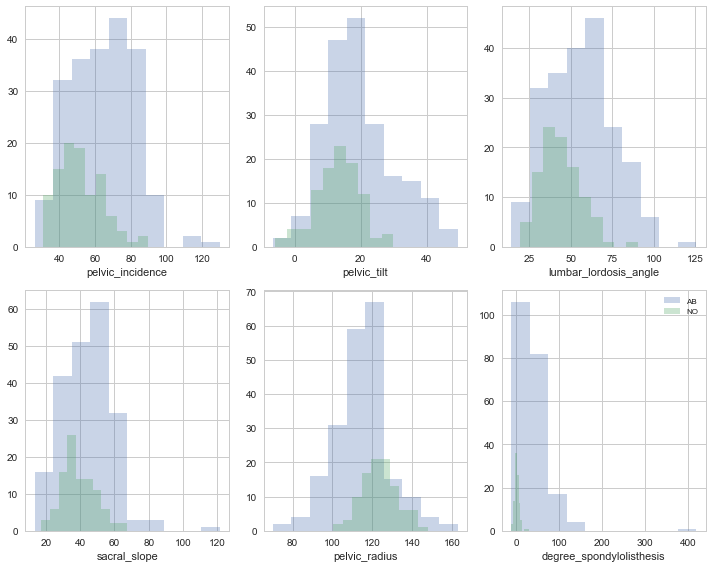

In [4]:
# Melihat pesebaran kelas per fitur

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (8,6)

label_dict = {1: 'AB',
              2: 'NO'}

feature_dict = {0: 'pelvic_incidence',
                1: 'pelvic_tilt',
                2: 'lumbar_lordosis_angle',
                3: 'sacral_slope',
                4: 'pelvic_radius', 
                5: 'degree_spondylolisthesis'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    for cnt in range(6):
        plt.subplot(2, 3, cnt+1)
        for lab in ('AB', 'NO'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

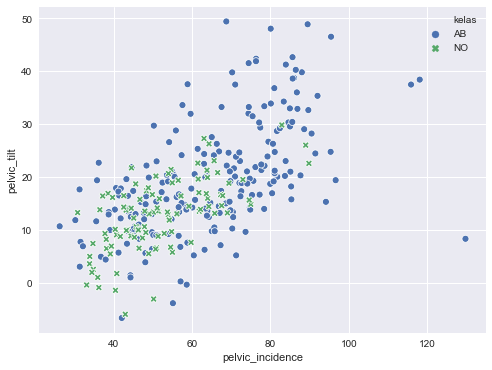

In [5]:
# memilih 2 fitur, melihat persebarannya
# plt.style.use("ggplot")
# plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = vertebral.pelvic_incidence, y = vertebral.pelvic_tilt,
                hue = vertebral.kelas, style = vertebral.kelas);

Iris Plants Database
====================

Notes
-----
Data Set Characteristics:<br>
    :Number of Instances: 150 (50 in each of three classes)<br>
    :Number of Attributes: 4 numeric, predictive attributes and the class<br>
    :Attribute Information:<br>
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    
    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

## 3. Melakukan Standarisasi Terhadap Data
---

In [6]:
def getRowData(data, col):
    dataRow = []
    for row in data:
        dataRow.append(row[col])
    return dataRow

X_f = [getRowData(X, 0), getRowData(X, 1),
      getRowData(X, 2), getRowData(X, 3),
      getRowData(X, 4), getRowData(X, 5)]

minF = [min(X_f[0]), min(X_f[1]), min(X_f[2]), min(X_f[3]), min(X_f[4]), min(X_f[5])]

maxF = [max(X_f[0]), max(X_f[1]), max(X_f[2]), max(X_f[3]), max(X_f[4]), max(X_f[5])]

X_MinMax = X.copy()
for i in range(len(X)): # baris
    for j in range(len(X[0])): # kolom
        X_MinMax[i, j] = (X_MinMax[i, j] - minF[j]) / (maxF[j] - minF[j])

In [7]:
print(f"minFitur1: {minF[0]}")
print(f"minFitur2: {minF[1]}")
print(f"minFitur3: {minF[2]}")
print(f"minFitur3: {minF[3]}")
print(f"minFitur3: {minF[4]}")
print(f"minFitur4: {minF[5]}\n")

print(f"maxFitur1: {maxF[0]}")
print(f"maxFitur2: {maxF[1]}")
print(f"maxFitur3: {maxF[2]}")
print(f"maxFitur3: {maxF[3]}")
print(f"maxFitur3: {maxF[4]}")
print(f"maxFitur4: {maxF[5]}\n")

print(f"Hasil manual:\n {X_MinMax[:10]}")

minFitur1: 26.15
minFitur2: -6.55
minFitur3: 14.0
minFitur3: 13.37
minFitur3: 70.08
minFitur4: -11.06

maxFitur1: 129.83
maxFitur2: 49.43
maxFitur3: 125.74
maxFitur3: 121.43
maxFitur3: 163.07
maxFitur4: 418.54

Hasil manual:
 [[0.35570988 0.51982851 0.22919277 0.25087914 0.30745241 0.02516294]
 [0.12451775 0.29671311 0.0986218  0.14464187 0.47671793 0.0363594 ]
 [0.41165123 0.51393355 0.32298192 0.30760689 0.38617056 0.01752793]
 [0.41618441 0.55734191 0.2712547  0.28937627 0.34186472 0.05183892]
 [0.22723765 0.28938907 0.12815464 0.24699241 0.40961394 0.04418063]
 [0.13599537 0.36566631 0.09951674 0.11993337 0.64791913 0.03093575]
 [0.26311728 0.40032154 0.20735636 0.22394966 0.54296161 0.03968808]
 [0.18537809 0.30921758 0.13459817 0.19655747 0.50747392 0.00088454]
 [0.17013889 0.35869954 0.25675676 0.15630205 0.59060114 0.05668063]
 [0.10165895 0.20650232 0.25013424 0.1694429  0.15227444 0.02728119]]


In [8]:
# impor library untuk melakukan standarisasi dataset

from sklearn.preprocessing import MinMaxScaler
X_lib_minmax = MinMaxScaler().fit_transform(X)

print(f"Hasil Library: \n{X_lib_minmax[:10]}")
# X_std_minmax.mean(axis=0)
# X_std_minmax.std(axis=0)

Hasil Library: 
[[0.35570988 0.51982851 0.22919277 0.25087914 0.30745241 0.02516294]
 [0.12451775 0.29671311 0.0986218  0.14464187 0.47671793 0.0363594 ]
 [0.41165123 0.51393355 0.32298192 0.30760689 0.38617056 0.01752793]
 [0.41618441 0.55734191 0.2712547  0.28937627 0.34186472 0.05183892]
 [0.22723765 0.28938907 0.12815464 0.24699241 0.40961394 0.04418063]
 [0.13599537 0.36566631 0.09951674 0.11993337 0.64791913 0.03093575]
 [0.26311728 0.40032154 0.20735636 0.22394966 0.54296161 0.03968808]
 [0.18537809 0.30921758 0.13459817 0.19655747 0.50747392 0.00088454]
 [0.17013889 0.35869954 0.25675676 0.15630205 0.59060114 0.05668063]
 [0.10165895 0.20650232 0.25013424 0.1694429  0.15227444 0.02728119]]


## 4. Menghitung Vektor Eigen dan Nilai Eigen
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

##### Menggunakan rumus

In [9]:
z_mean_vec = np.mean(X_MinMax, axis=0) # menghitung mean global untuk zero mean
cov_mat = (X_MinMax - z_mean_vec).T.dot((X_MinMax - z_mean_vec)) / (len(X_MinMax)-1)
print(f'Matriks Kovarian:\n {cov_mat}')
len(X_MinMax)

Matriks Kovarian:
 [[ 0.02763685  0.01870009  0.01979975  0.01682892 -0.00589226  0.0092835 ]
 [ 0.01870009  0.03196252  0.01284669  0.00138411  0.00083624  0.00621838]
 [ 0.01979975  0.01284669  0.02757064  0.01234194 -0.00191115  0.00774712]
 [ 0.01682892  0.00138411  0.01234194  0.01542954 -0.00608666  0.00568592]
 [-0.00589226  0.00083624 -0.00191115 -0.00608666  0.02051074 -0.00032646]
 [ 0.0092835   0.00621838  0.00774712  0.00568592 -0.00032646  0.00764358]]


310

##### Menggunakan Library Numpy

In [10]:
covariance_matrix = np.cov(X_MinMax.T)
print("Matriks Kovarian:\n", covariance_matrix)

Matriks Kovarian:
 [[ 0.02763685  0.01870009  0.01979975  0.01682892 -0.00589226  0.0092835 ]
 [ 0.01870009  0.03196252  0.01284669  0.00138411  0.00083624  0.00621838]
 [ 0.01979975  0.01284669  0.02757064  0.01234194 -0.00191115  0.00774712]
 [ 0.01682892  0.00138411  0.01234194  0.01542954 -0.00608666  0.00568592]
 [-0.00589226  0.00083624 -0.00191115 -0.00608666  0.02051074 -0.00032646]
 [ 0.0092835   0.00621838  0.00774712  0.00568592 -0.00032646  0.00764358]]


In [11]:
nilai_eigen, vektor_eig = np.linalg.eig(covariance_matrix)
print(f"Vektor Eigen:\n {vektor_eig}\n")
print(f"Nilai Eigen:\n {nilai_eigen}")

Vektor Eigen:
 [[ 5.91618406e-01  1.00081776e-01  6.48491333e-01 -2.26190104e-01
   4.08922795e-01 -3.24110320e-02]
 [ 4.67092818e-01 -6.70434335e-01 -3.50145124e-01 -4.23657108e-02
  -1.59682580e-02 -4.55730902e-01]
 [ 5.15062422e-01  8.01383577e-02  2.02763389e-06 -5.83246025e-03
  -7.33444172e-01  4.36250127e-01]
 [ 3.25660035e-01  4.43335686e-01 -6.75912259e-01 -1.95023188e-01
   4.00609737e-01  2.04986398e-01]
 [-1.15823953e-01 -5.80957286e-01 -7.30617887e-06 -1.32188614e-01
   2.95136043e-01  7.37898591e-01]
 [ 2.16917071e-01  4.62435327e-03  3.03514419e-05  9.44193461e-01
   2.16779527e-01  1.20128862e-01]]

Nilai Eigen:
 [7.34594714e-02 2.74018734e-02 1.11748200e-09 3.96403930e-03
 8.54928570e-03 1.73791894e-02]


In [12]:
# X_df = pd.DataFrame(X)
# X_df.cov()

##### Menggunakan Library Sklean PCA langsung

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_MinMax)
print(f"Matrix Kovarian menggunakan library: \n{pca.get_covariance()}\n")
print(f"Vektor Eigen (transpose) menggunakan library: \n{pca.components_}\n")
print(f"Nilai Eigen menggunakan library: \n{pca.explained_variance_}\n")

Matrix Kovarian menggunakan library: 
[[ 0.02763685  0.01870009  0.01979975  0.01682892 -0.00589226  0.0092835 ]
 [ 0.01870009  0.03196252  0.01284669  0.00138411  0.00083624  0.00621838]
 [ 0.01979975  0.01284669  0.02757064  0.01234194 -0.00191115  0.00774712]
 [ 0.01682892  0.00138411  0.01234194  0.01542954 -0.00608666  0.00568592]
 [-0.00589226  0.00083624 -0.00191115 -0.00608666  0.02051074 -0.00032646]
 [ 0.0092835   0.00621838  0.00774712  0.00568592 -0.00032646  0.00764358]]

Vektor Eigen (transpose) menggunakan library: 
[[ 5.91618406e-01  4.67092818e-01  5.15062422e-01  3.25660035e-01
  -1.15823953e-01  2.16917071e-01]
 [ 1.00081776e-01 -6.70434335e-01  8.01383577e-02  4.43335686e-01
  -5.80957286e-01  4.62435327e-03]
 [ 3.24110320e-02  4.55730902e-01 -4.36250127e-01 -2.04986398e-01
  -7.37898591e-01 -1.20128862e-01]
 [ 4.08922795e-01 -1.59682580e-02 -7.33444172e-01  4.00609737e-01
   2.95136043e-01  2.16779527e-01]
 [-2.26190104e-01 -4.23657108e-02 -5.83246025e-03 -1.950231

## 4. Menghitung Principal Component
---

In [14]:
# Melihat nilai eigein (terurut)
nilai_eigen[::-1].sort()
# nilai_eigen_sort = nilai_eigen_sort[::-1]
for val in nilai_eigen:
    print(val)
    
# tye

0.07345947143949497
0.027401873395277214
0.01737918938557526
0.008549285704428594
0.003964039302468199
1.1174820022680314e-09


In [15]:
# Menjumlahkan Nilai Eigen
sum_eigens = 0
for eigen in nilai_eigen:
    sum_eigens += eigen
print(f"Jumlah nilai eigen seluruhnya: {sum_eigens}")

Jumlah nilai eigen seluruhnya: 0.13075386034472622


In [16]:
# semisal ingin memiliki minimal 95% data maka
min_eigen_sum = 0.95 * sum_eigens
print(f"minimal jumlah nilai eigen jika 95% informasi \n (terbesar ke terkecil): {min_eigen_sum}")

minimal jumlah nilai eigen jika 95% informasi 
 (terbesar ke terkecil): 0.1242161673274899


Maka syarat 95% data akan terpenuhi ketika menggunakan nilai eigen 1 (0.23) dan 2 (0.03) menjadi 0.26 <br>
Hal ini berarti, dari 4 principal component, kita hanya cukup memilih 2 saja (2 kolom dari vektor eigen)

### Alternatif menggunakan "explained variance" atau varians terjelaskan
Variansi terjelaskan dapat memberitahukan kepada kita seberapa banyak informasi yang berada pada tiap principle component.

In [17]:
# Mencari Varians dari keempat
sum_eigens = 0
for eigen in nilai_eigen:
    sum_eigens += eigen
    
v_ter = [(i / sum(nilai_eigen)) * 100 for i in nilai_eigen]
print(f"Maka, variansi terjelaskannya: \n{v_ter}")

Maka, variansi terjelaskannya: 
[56.18149341504919, 20.956837008890982, 13.291530620783101, 6.538457588853451, 3.0316805117777794, 8.54645514344161e-07]


Dari hasil tersebut dapat diketahui bahwa PC I mengandung 84.14% informasi, PC II 11.73%, PC III 3.49%, dan PC IV 0.64%.

In [18]:
# menghitung dalam kumulatif
kumulatif_v_ter = np.cumsum(v_ter)
print(f"Maka secara kumulatif, variansinya adalah: \n{kumulatif_v_ter}")

Maka secara kumulatif, variansinya adalah: 
[ 56.18149342  77.13833042  90.42986104  96.96831863  99.99999915
 100.        ]


Dari keluaran tersebut, dapat disimpulkan bahwa jika menggunakan PC I saja dapat mengandung 92.46% informasi, jika PC I dan PC II maka 97.76% informasi, jika PC I, II, dan III maka mengandung 99.48% informasi, dan jika menggunakan semua PC maka 100% informasi

#### Visualisasi pemilihan variansi

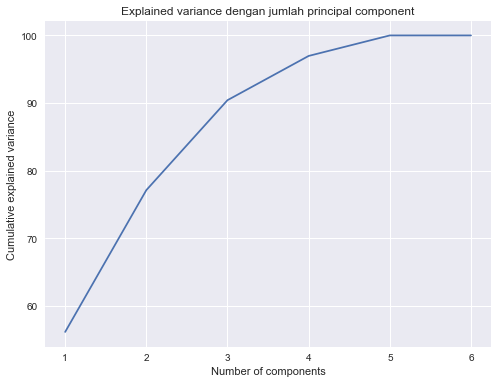

In [19]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (8,6)

sns.lineplot(x = [1,2,3,4,5,6], y = kumulatif_v_ter);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance dengan jumlah principal component")
plt.show()

## 5. Memilih PC dan Menghitung Matriks Proyeksi
---

In [20]:
matriks_proj = (vektor_eig.T[:][:])[:4].T # ambil 2 Principal Component, maka ambil 2 kolom
# (vektor_eig.T)[:2].T
print("Projection matrix: \n", matriks_proj)

Projection matrix: 
 [[ 5.91618406e-01  1.00081776e-01  6.48491333e-01 -2.26190104e-01]
 [ 4.67092818e-01 -6.70434335e-01 -3.50145124e-01 -4.23657108e-02]
 [ 5.15062422e-01  8.01383577e-02  2.02763389e-06 -5.83246025e-03]
 [ 3.25660035e-01  4.43335686e-01 -6.75912259e-01 -1.95023188e-01]
 [-1.15823953e-01 -5.80957286e-01 -7.30617887e-06 -1.32188614e-01]
 [ 2.16917071e-01  4.62435327e-03  3.03514419e-05  9.44193461e-01]]


In [21]:
# Operasi dot vektor untuk transformasi data X (iris) menggunakan matriks proyeksi
X_pca = X_MinMax.dot(matriks_proj)
X_pca

array([[ 0.62285048, -0.36182036, -0.12091395, -0.16962799],
       [ 0.26283163, -0.39122102, -0.12091136, -0.09820524],
       [ 0.70920054, -0.3653711 , -0.12091597, -0.21125644],
       ...,
       [ 0.60515524, -0.53612474, -0.12085319, -0.20729531],
       [ 0.37848519, -0.351857  , -0.12091333, -0.14062683],
       [ 0.229992  , -0.38876057, -0.12091175, -0.10725538]])

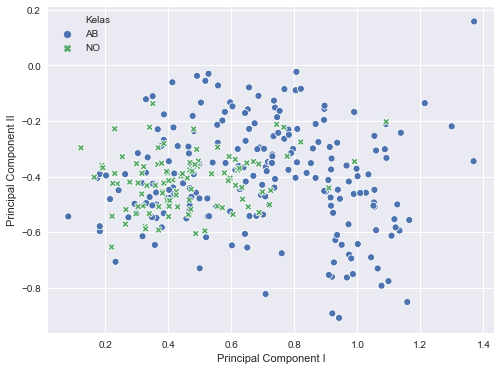

In [29]:
# menggabungkan X_pca dengan kolom kelasnya kembali
X_pca_all = np.column_stack((X_pca, y))
X_pca_df = pd.DataFrame(X_pca_all)

X_pca_df.columns=['Principal Component I', 'Principal Component II',
                  'Principal Component III', 'Principal Component IV', 'Kelas']

# modifikasi tipe data
X_pca_df['Principal Component I'] = X_pca_df['Principal Component I'].astype('float')
X_pca_df['Principal Component II'] = X_pca_df['Principal Component II'].astype('float')
X_pca_df['Principal Component III'] = X_pca_df['Principal Component III'].astype('float')
X_pca_df['Principal Component IV'] = X_pca_df['Principal Component IV'].astype('float')
X_pca_df['Kelas'] = X_pca_df['Kelas'].astype('category')

sns.scatterplot(x = X_pca_df['Principal Component I'], y = X_pca_df['Principal Component II'],
                hue = X_pca_df['Kelas'], style = X_pca_df['Kelas']);

In [23]:
X_pca_df.head()

,Principal Component I,Principal Component II,Principal Component III,Principal Component IV,Kelas
0,0.622850,-0.361820,-0.120914,-0.169628,AB
1,0.262832,-0.391221,-0.120911,-0.098205,AB
2,0.709201,-0.365371,-0.120916,-0.211256,AB
3,0.712153,-0.380349,-0.120852,-0.172011,AB
4,0.378193,-0.289267,-0.120913,-0.125007,AB


In [24]:
# # info
# X_pca_df.info()

# # ubah kategori menjadi nilai numerikal
# kategori = X_pca_df.select_dtypes(['category']).columns

# X_pca_df[kategori] = X_pca_df[kategori].apply(lambda x: x.cat.codes)
# X_pca_df.head()

In [30]:
# convert dataset hasil PCA ke tipe list
vertebral_transform = X_pca_df.values.tolist()
# iris_transform[0][4]
type(vertebral_transform[0][4])

str

# K-Nearest Neighboor
---

In [32]:
# split data training and testing
cnt = 0
vertebral_training = []
vertebral_testing = []
for i in range(0, len(vertebral_transform)):
    if (i % 5 == 0):
        vertebral_testing.append(vertebral_transform[i])
    else:
        vertebral_training.append(vertebral_transform[i])

print(len(vertebral_training))
print(len(vertebral_testing))

248
62


In [55]:
# Example of calculating Euclidean distance
from math import sqrt
from sklearn import metrics

# menghitung jarak euclid
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
#     print(row2[2])
    return sqrt(distance)

# fungsi dari inverse_square (weighted KNN)
def inverse_square(jarakInv):
#     if (jarakInv):
    return (1.0/(jarakInv**2))

# # Test distance function
# row0 = vertebral_training[0]
# jarak = []
# for row in vertebral_training:
#     distance = euclidean_distance(row0, row)
#     jarak.append([inverse_square(distance), row[4]])
# # karena jarak langsung dilakukan inverse maka di sort secara menurun
# jarak.sort(reverse=True)

# # for i in range(len(jarak)):
# #     jarak[i].append("hello")
# jarak[:10]
# # for i in range(len(jarak)):
# #     jarak[i][0] = inverse_square(jarak[i][0])
# # print(jarak[:10])

# # from sklearn.metrics import plot_confusion_matrix

# # plot_confusion_matrix(['a', 'a', 'a'], ['a', 'a', 'a'], ['a', 'b', 'c'])
# # print(metrics.classification_report(['a', 'C', 'a'], ['a', 'a', 'C']))

In [68]:
def voting(k, jarak_jarak_tetangga):
#     print(f"jaraknya:")
    vote = [["AB", 0.0], ["NO", 0.0]]
    for i in range(0, k):
#         print(jarak_jarak_tetangga[i][1])
        if (jarak_jarak_tetangga[i][1] == "AB"):
            vote[0][1] += jarak_jarak_tetangga[i][0]
        elif (jarak_jarak_tetangga[i][1] == "NO"):
            vote[1][1] += jarak_jarak_tetangga[i][0]
    nilaiMaks = -99999999999.9
    kelas = ""
    for i in range(len(vote)):
        if (nilaiMaks < vote[i][1]):
            nilaiMaks = vote[i][1]
            kelas = vote[i][0]
    return kelas

def algo_weighted_knn(k, dataTrain, dataTest):
    y_pred = []
    for barisData in dataTest:  # untuk setiap data dalam dataTest
        jarak = []
#         print(f"baris data test: {barisData}")
        for barisTraining in dataTrain:
#             print(f"baris data training: {barisTraining}")
            jarakTetangga = euclidean_distance(barisData, barisTraining)
            jarak.append([inverse_square(jarakTetangga), barisTraining[4]])
        jarak.sort(reverse=True)
        # nilai k bebas
        kelas_pred = voting(k, jarak)
#         print(kelas_pred)
        y_pred.append(kelas_pred)
    return y_pred


In [69]:

max(10, 1, 12)

12

              precision    recall  f1-score   support

          AB       0.86      0.88      0.87        42
          NO       0.74      0.70      0.72        20

    accuracy                           0.82        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.82      0.82      0.82        62



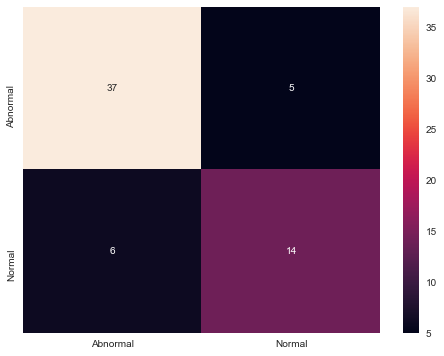

In [86]:


# algo_weighted_knn(vertebral_training, vertebral_testing)

# vertebral_training
y_prediksi_knn = algo_weighted_knn(2, vertebral_training, vertebral_testing)
y_testing = []
for i in range(len(vertebral_testing)):
    y_testing.append(vertebral_testing[i][4])

y_prediksi_knn
y_testing
# # vertebral_training[0][2]
# # vertebral_testing[0][2]

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_testing,y_prediksi_knn)
print(metrics.classification_report(y_testing, y_prediksi_knn))
f = sns.heatmap(cm, annot=True, xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])

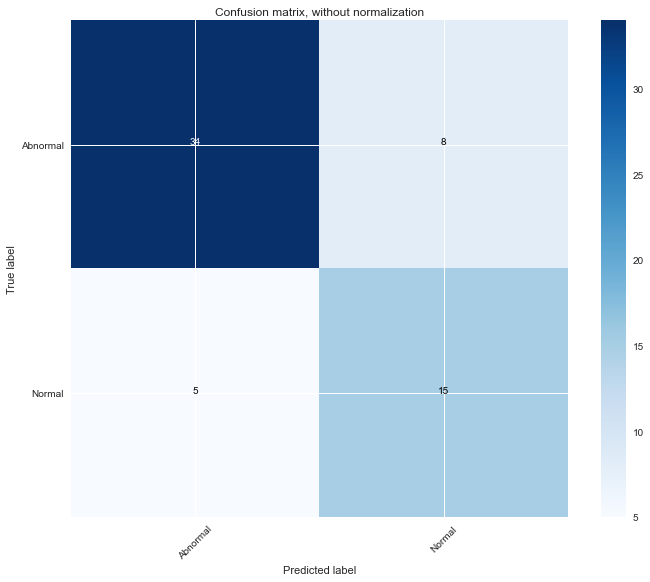

In [83]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
com = confusion_matrix(y_testing,y_prediksi_knn)
plot_confusion_matrix(cm, classes=["Abnormal", "Normal"],
                      title='Confusion matrix, without normalization')